EJERCICIO

FASE 1: Exploración y Limpieza
1.1 Exploración Inicial:
Exploración inicial de datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
Utilización de funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Unión de los dos conjuntos de datos de la forma más eficiente.
1.2 Limpieza de Datos:
Eliminación o gestión de los valores nulos (si los hay) en las columnas clave para asegurar que los datos estén completos.
Verificación de la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
Ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

FASE 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
    1 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
    2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
    3 ¿Cuál es la distribución de los clientes por provincia o estado?
    4 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
    5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
    6 ¿Cómo se distribuyen los clientes según su estado civil y género?

BONUS 
Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


In [1]:
# Importar librerías necesarias

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
'''HOJA DE RUTA FASE 1

1) visión general: head(), tail(), sample(), shape, columns
2) info() --> tipos datos, nulos, columnas
3) describe() --> numéricas (min, max, media, mediana (percentil 50%) std)
   describe(include='O') --> categóricas (num categorias, categoría predominante y su recuento)
4) análisis variables categoricas: for col in df.selectdtypes(include='O').columns --> df[col].value_count()
5) análisis variables numéricas: histograma y boxplot 
6) duplicados --> filas completas duplicadas --> eliminarlas
7) nulos:
    variables numéricas: 
        - si es un porcentaje alto (> 30) --> tecnicas avanzadas (KNN imputer, iterative imputer)
        - si es un porcentaje moderadamente alto pero columna muy importante (>10) --> avanzadas
        - si es un porcentaje bajo nulos --> media si hay simetria y no atipicos, mediana si no hay simetrica y atipicos (si no hay atipicos pero distribucion claramente asimetrica, mejor mediana)
    variables categóricas:
        - si categoría claramente predominante (moda) --> imputamos con dicha categoría
        - si no hay categoría predominante muy por encima de las demás --> generamos categoría nueva (desconocido)

transformación --> conversión tipos de datos antes del análisis por categóricas/numéricas 
(si para convertir dato tengo que hacer transformación, ejemplo, numérico con comas que pandas no identifica como float, 
transformaríamos antes de hacer análisis de numéricas)'''


"HOJA DE RUTA FASE 1\n\n1) visión general: head(), tail(), sample(), shape, columns\n2) info() --> tipos datos, nulos, columnas\n3) describe() --> numéricas (min, max, media, mediana (percentil 50%) std)\n   describe(include='O') --> categóricas (num categorias, categoría predominante y su recuento)\n4) análisis variables categoricas: for col in df.selectdtypes(include='O').columns --> df[col].value_count()\n5) análisis variables numéricas: histograma y boxplot \n6) duplicados --> filas completas duplicadas --> eliminarlas\n7) nulos:\n    variables numéricas: \n        - si es un porcentaje alto (> 30) --> tecnicas avanzadas (KNN imputer, iterative imputer)\n        - si es un porcentaje moderadamente alto pero columna muy importante (>10) --> avanzadas\n        - si es un porcentaje bajo nulos --> media si hay simetria y no atipicos, mediana si no hay simetrica y atipicos (si no hay atipicos pero distribucion claramente asimetrica, mejor mediana)\n    variables categóricas:\n        -

In [3]:
# abrimos ambos datafames:

df_actividad_vuelos = pd.read_csv('Customer Flight Activity.csv')
df_lealtad_clientes = pd.read_csv('Customer Loyalty History.csv')

# Fase 1.1: Exploración - Dataframe Actividad de vuelos (Customer Flight Activity) y del Dataframe Lealtad de los clientes (Customer Loyalty History)

In [4]:
# ============================
# DF Actividad de vuelos
# ============================
# Realizamos una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
# Solicitamos visión general del DF

display(df_actividad_vuelos.head(3))
display(df_actividad_vuelos.tail(3))
display(df_actividad_vuelos.sample(3))

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
60151,603658,2017,4,10,0,10,2850,285.0,0,0
370767,944355,2018,10,7,6,13,1261,126.0,0,0
206017,272148,2018,1,3,3,6,1308,130.0,0,0


In [5]:
df_actividad_vuelos.shape

(405624, 10)

In [6]:
print(f"El número de filas es {df_actividad_vuelos.shape[0]} y el número de columnas es {df_actividad_vuelos.shape[1]}")

El número de filas es 405624 y el número de columnas es 10


In [7]:
# Los nombres de las columnas son correctos y claros, pero como buena práctica de Python y Pandas, cambiamos los espacios por guiones bajos
nuevas_columnas = {col: col.replace(' ','_') for col in df_actividad_vuelos.columns}
nuevas_columnas

{'Loyalty Number': 'Loyalty_Number',
 'Year': 'Year',
 'Month': 'Month',
 'Flights Booked': 'Flights_Booked',
 'Flights with Companions': 'Flights_with_Companions',
 'Total Flights': 'Total_Flights',
 'Distance': 'Distance',
 'Points Accumulated': 'Points_Accumulated',
 'Points Redeemed': 'Points_Redeemed',
 'Dollar Cost Points Redeemed': 'Dollar_Cost_Points_Redeemed'}

In [8]:
df_actividad_vuelos.rename(columns = nuevas_columnas, inplace=True)
df_actividad_vuelos.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed'],
      dtype='object')

In [9]:
# Solicitamos información general del DF
df_actividad_vuelos.info() # observamos que no hay nulos y que los datos son todos de tipo numérico, enteros o decimales.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights_Booked               405624 non-null  int64  
 4   Flights_with_Companions      405624 non-null  int64  
 5   Total_Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points_Accumulated           405624 non-null  float64
 8   Points_Redeemed              405624 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [10]:
# Utilizamos un .describe() para obtener una visión general de las principales estadísticas descriptivas
# Transponemos los resultados con .T para tener una mejor lectura
df_actividad_vuelos.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty_Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights_Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights_with_Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total_Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points_Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points_Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar_Cost_Points_Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [11]:
# Confirmamos que no hay valores nulos en ninguna columna
print("Valores nulos en el df_actividad_vuelos:")
df_actividad_vuelos.isnull().sum()

Valores nulos en el df_actividad_vuelos:


Loyalty_Number                 0
Year                           0
Month                          0
Flights_Booked                 0
Flights_with_Companions        0
Total_Flights                  0
Distance                       0
Points_Accumulated             0
Points_Redeemed                0
Dollar_Cost_Points_Redeemed    0
dtype: int64

In [12]:
# Utilizamos .duplicated() para identificar filas duplicadas en el DF
print("Serie booleana de filas duplicadas (considerando todas las columnas):")
df_actividad_vuelos.duplicated()

Serie booleana de filas duplicadas (considerando todas las columnas):


0         False
1         False
2         False
3         False
4         False
          ...  
405619    False
405620    False
405621    False
405622    False
405623    False
Length: 405624, dtype: bool

In [13]:
# Obtenemos el conteo de filas duplicadas
print("\nNúmero total de filas duplicadas en el DataFrame:")
df_actividad_vuelos.duplicated().sum()


Número total de filas duplicadas en el DataFrame:


1864

In [14]:
# Comprobamos el número el valores duplicados para la columna 'Loyalty_Number', que representa un identificador único para cada cliente 
# y quizá en algún momento interesa eliminar duplicados de esta columna en concreto
print("\nNúmero de valores duplicados en la columna 'Loyalty_Number':")
df_actividad_vuelos.duplicated(subset = "Loyalty_Number").sum()


Número de valores duplicados en la columna 'Loyalty_Number':


388887

In [15]:
# Para comprobar duplicados y verificar que existen, filtramos solo las filas con Loyalty_Number duplicado
duplicados_loyalty_nr = df_actividad_vuelos[df_actividad_vuelos.duplicated(subset="Loyalty_Number", keep=False)]

# Ordenamos los duplicados de menor a mayor por Loyalty_Number para facilitar la visualización
duplicados_loyalty_nr = duplicados_loyalty_nr.sort_values(by="Loyalty_Number", ascending=True)

# Queremos una muestra de los primeros 50 duplicados ya ordenados
muestra_duplicados = duplicados_loyalty_nr.head(50)

print(muestra_duplicados)

        Loyalty_Number  Year  Month  Flights_Booked  Flights_with_Companions  \
0               100018  2017      1               3                        0   
388723          100018  2018     12              17                        6   
185911          100018  2017     12               6                        0   
101406          100018  2017      7              10                        0   
287317          100018  2018      6               0                        0   
169010          100018  2017     11              13                        1   
46353           100018  2018     10               6                        4   
304218          100018  2018      7               9                        7   
16901           100018  2017      2               2                        2   
213311          100018  2017      3              14                        3   
50703           100018  2017      4               4                        0   
270416          100018  2018      5     

In [16]:
# ============================
# DF Lealtad de clientes
# ============================
# Realizamos una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
# Solicitamos visión general del DF

display(df_lealtad_clientes.head(3))
display(df_lealtad_clientes.tail(3))
display(df_lealtad_clientes.sample(3))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
12178,605907,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,76495.0,Married,Star,3286.17,Standard,2015,11,NaN,NaN
12640,907595,Canada,British Columbia,Vancouver,V5R 1W3,Male,High School or Below,47663.0,Married,Star,4177.88,Standard,2018,11,NaN,NaN
12081,309480,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,71012.0,Married,Star,3045.06,Standard,2018,7,NaN,NaN


In [17]:
df_lealtad_clientes.shape

(16737, 16)

In [18]:
print(f"El número de filas es {df_lealtad_clientes.shape[0]} y el número de columnas es {df_lealtad_clientes.shape[1]}")

El número de filas es 16737 y el número de columnas es 16


In [19]:
# Los nombres de las columnas son correctos y claros, pero como buena práctica de Python y Pandas, cambiamos los espacios por guiones bajos
nuevas_columnas = {col: col.replace(' ','_') for col in df_lealtad_clientes.columns}
nuevas_columnas

{'Loyalty Number': 'Loyalty_Number',
 'Country': 'Country',
 'Province': 'Province',
 'City': 'City',
 'Postal Code': 'Postal_Code',
 'Gender': 'Gender',
 'Education': 'Education',
 'Salary': 'Salary',
 'Marital Status': 'Marital_Status',
 'Loyalty Card': 'Loyalty_Card',
 'CLV': 'CLV',
 'Enrollment Type': 'Enrollment_Type',
 'Enrollment Year': 'Enrollment_Year',
 'Enrollment Month': 'Enrollment_Month',
 'Cancellation Year': 'Cancellation_Year',
 'Cancellation Month': 'Cancellation_Month'}

In [20]:
df_lealtad_clientes.rename(columns = nuevas_columnas, inplace=True)
df_lealtad_clientes.columns

Index(['Loyalty_Number', 'Country', 'Province', 'City', 'Postal_Code',
       'Gender', 'Education', 'Salary', 'Marital_Status', 'Loyalty_Card',
       'CLV', 'Enrollment_Type', 'Enrollment_Year', 'Enrollment_Month',
       'Cancellation_Year', 'Cancellation_Month'],
      dtype='object')

In [21]:
# Solicitamos información general del DF
df_lealtad_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty_Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal_Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital_Status      16737 non-null  object 
 9   Loyalty_Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment_Type     16737 non-null  object 
 12  Enrollment_Year     16737 non-null  int64  
 13  Enrollment_Month    16737 non-null  int64  
 14  Cancellation_Year   2067 non-null   float64
 15  Cancellation_Month  2067 non-null   float64
dtypes: f

In [22]:
# Utilizamos un .describe() para obtener una visión general de las principales estadísticas descriptivas de todas las columnas 
# y todos los tipos de datos (include= 'all')
# Transponemos los resultados con .T para tener una mejor lectura
df_lealtad_clientes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty_Number,16737.0,NaN,NaN,NaN,549735.880445,258912.132453,100018.0,326603.0,550434.0,772019.0,999986.0
Country,16737,1,Canada,16737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province,16737,11,Ontario,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16737,29,Toronto,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal_Code,16737,55,V6E 3D9,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,16737,2,Female,8410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,16737,5,Bachelor,10475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,12499.0,NaN,NaN,NaN,79245.609409,35008.297285,-58486.0,59246.5,73455.0,88517.5,407228.0
Marital_Status,16737,3,Married,9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty_Card,16737,3,Star,7637,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Confirmamos que hay valores nulos en tres columnas
print("Valores nulos en el df_actividad_vuelos:")
df_lealtad_clientes.isnull().sum()

Valores nulos en el df_actividad_vuelos:


Loyalty_Number            0
Country                   0
Province                  0
City                      0
Postal_Code               0
Gender                    0
Education                 0
Salary                 4238
Marital_Status            0
Loyalty_Card              0
CLV                       0
Enrollment_Type           0
Enrollment_Year           0
Enrollment_Month          0
Cancellation_Year     14670
Cancellation_Month    14670
dtype: int64

In [24]:
# Utilizamos .duplicated() para identificar filas duplicadas en el DF
print("Serie booleana de filas duplicadas (considerando todas las columnas):")
df_lealtad_clientes.duplicated()

Serie booleana de filas duplicadas (considerando todas las columnas):


0        False
1        False
2        False
3        False
4        False
         ...  
16732    False
16733    False
16734    False
16735    False
16736    False
Length: 16737, dtype: bool

In [25]:
# Obtenemos el conteo de filas duplicadas y averiguamos que no hay filas duplicadas en el DF
print("\nNúmero total de filas duplicadas en el DataFrame:")
df_lealtad_clientes.duplicated().sum()


Número total de filas duplicadas en el DataFrame:


0

# Fase 1.2: Limpieza - Dataframe Actividad de vuelos (Customer Flight Activity) y Dataframe Lealtad de los clientes (Customer Loyalty History)
(Eliminar duplicados, eliminar nulos en columnas clave y ajustar tipos de dato)

In [26]:
# Respecto al DF Actividad de vuelos, hemos visto que no hay nulos en ninguna columna y sí hay duplicados en columnas clave,
# como la de Loyalty_Number, pero si las eliminamos podemos perder información valioso, con lo que no lo haremos.
# En cambio, sí transformaremos los datos de la columna "Month"
df_actividad_vuelos["Month"] = df_actividad_vuelos["Month"].astype("category")
print(df_actividad_vuelos["Month"].unique()[:12])


[1, 9, 2, 3, 11, ..., 7, 6, 8, 10, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]


In [27]:
# Transformamos los valores de Month de int a object y cambiamos los meses del año de número a letra
# Creamos un diccionario para mapear números a meses
meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

# Convertimos la columna "Month" de números a nombres de meses
df_actividad_vuelos["Month"] = df_actividad_vuelos["Month"].map(meses)

# Convertimos la columna a category y mantenemos el orden de los meses
df_actividad_vuelos["Month"] = pd.Categorical(
    df_actividad_vuelos["Month"],
    categories=list(meses.values()),  # para mantener el orden Enero-Diciembre
    ordered=True
)

# Comprobamos resultado
print(df_actividad_vuelos["Month"].head())
print(df_actividad_vuelos["Month"].dtype)

0    Enero
1    Enero
2    Enero
3    Enero
4    Enero
Name: Month, dtype: category
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']
category


In [28]:
# Con respecto al DF Lealtad de los clientes, sí hace falta cierta limpieza:
# Cambiamos tipos de datos de las siguientes columnas: 
# Enrollment_Month --> int > cat // Cancellation_Year --> float > int // Cancellation_Month --> float > cat
# Primero, transformaremos los datos de la columna "Month"
# Creamos el diccionario para mapear números a meses
meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

# Reemplazamos los números por nombres de meses
df_lealtad_clientes["Enrollment_Month"] = df_lealtad_clientes["Enrollment_Month"].map(meses)

# Convertimos a tipo category (manteniendo orden de meses)
categorias = list(meses.values())
df_lealtad_clientes["Enrollment_Month"] = pd.Categorical(
    df_lealtad_clientes["Enrollment_Month"],
    categories=categorias,
    ordered=True
)

# Comprobamos resultado
print(df_lealtad_clientes["Enrollment_Month"].head())
print(df_lealtad_clientes["Enrollment_Month"].dtype)



0    Febrero
1      Marzo
2      Julio
3    Febrero
4    Octubre
Name: Enrollment_Month, dtype: category
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']
category


In [29]:
# Ahora seguimos transformando Cancellation_Year --> float > int
# Primero nos aseguramos de que estos float no tienen decimales reales, porque si los hay, se perderán al convertir a int.
print(df_lealtad_clientes["Cancellation_Year"].unique()[:20])  # muestra hasta 20 valores
print(df_lealtad_clientes["Cancellation_Year"].isnull().sum()) # verifica nulos

[  nan 2018. 2015. 2017. 2014. 2016. 2013.]
14670


In [30]:
# Tratamos los valores nulos antes de convertir (int no admite nulos). Por lo que rellenamos nulos antes de convetir
df_lealtad_clientes["Cancellation_Year"] = df_lealtad_clientes["Cancellation_Year"].fillna(0).astype(int)


In [31]:
# Verificamos que se han rellenados los valores nulos con 0 y que se han convertido todos en int
print(df_lealtad_clientes["Cancellation_Year"].unique()[:10])
print(df_lealtad_clientes["Cancellation_Year"].isnull().sum()) 

[   0 2018 2015 2017 2014 2016 2013]
0


In [32]:
# Ahora seguimos transformando Cancellation_Month --> float > int
# Hacemos lo mismo que antes, primero transformando a int y los nulos a 0
print(df_lealtad_clientes["Cancellation_Month"].unique()[:20])
print(df_lealtad_clientes["Cancellation_Month"].isnull().sum())

[nan  1. 12.  4.  2.  7. 11.  5.  6. 10.  8.  9.  3.]
14670


In [33]:
# Diccionario de meses
meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

# mos la columna de float → Int64 (mantiene los NaN sin romper nada)
df_lealtad_clientes["Cancellation_Month"] = df_lealtad_clientes["Cancellation_Month"].astype("Int64")

# Mapeamos los números a nombres de meses
df_lealtad_clientes["Cancellation_Month"] = df_lealtad_clientes["Cancellation_Month"].map(meses)

# Reemplazamos NaN por "Desconocido"
df_lealtad_clientes["Cancellation_Month"] = df_lealtad_clientes["Cancellation_Month"].fillna("Desconocido")

# Convertimos a categoría ordenada
categorias = list(meses.values()) + ["Desconocido"]
df_lealtad_clientes["Cancellation_Month"] = pd.Categorical(
    df_lealtad_clientes["Cancellation_Month"],
    categories=categorias,
    ordered=True
)

# Comprobar resultado
print(df_lealtad_clientes["Cancellation_Month"].value_counts(dropna=False))
print(df_lealtad_clientes["Cancellation_Month"].dtype)

Cancellation_Month
Desconocido    14670
Diciembre        213
Noviembre        212
Agosto           208
Julio            186
Octubre          180
Septiembre       176
Junio            165
Enero            155
Marzo            149
Mayo             148
Febrero          139
Abril            136
Name: count, dtype: int64
category


In [34]:
# Visualizamos los valores únicos de todas las columnas para ver si requieren unificación
for col in df_lealtad_clientes.columns:
    print(f"\n Columna: {col}")
    print(df_lealtad_clientes[col].unique()) # Comprobamos que están todos bien unificados y claros



 Columna: Loyalty_Number
[480934 549612 429460 ... 776187 906428 652627]

 Columna: Country
['Canada']

 Columna: Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

 Columna: City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

 Columna: Postal_Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 

In [35]:
# Unimos los dos conjuntos de datos de la manera más eficiente, que es a través de la columna Loyalty_Number
# ya que es un identificador único y dato común en ambos conjuntos

# Unimo ambos DataFrames con un merge en uno solo que llamaremos Clientes
df_clientes = pd.merge(
    df_actividad_vuelos, 
    df_lealtad_clientes, 
    on="Loyalty_Number",   # columna común
    how="inner"            # inner: solo clientes que están en ambos DF
)

# Comprobamos el nuevo DataFrame
print(df_clientes.shape)      # filas y columnas resultantes
print(df_clientes.head())     # primeras filas

(405624, 25)
   Loyalty_Number  Year  Month  Flights_Booked  Flights_with_Companions  \
0          100018  2017  Enero               3                        0   
1          100102  2017  Enero              10                        4   
2          100140  2017  Enero               6                        0   
3          100214  2017  Enero               0                        0   
4          100272  2017  Enero               0                        0   

   Total_Flights  Distance  Points_Accumulated  Points_Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar_Cost_Points_Redeemed Country          Province          City  \
0                            0  Canada           Alberta   

# Fase 2: Visualización

C:\Users\esthe\AppData\Local\Temp\ipykernel_2244\1825622959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clientes, x="Month", y="Flights_Booked", palette="Blues")


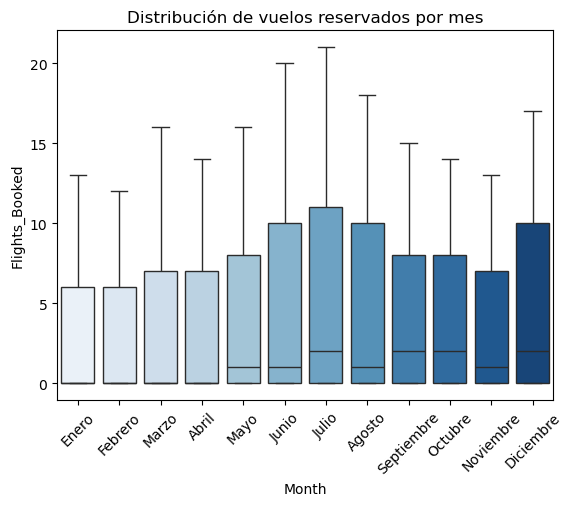

In [ ]:
# 1. Distribución de vuelos reservados por mes
# Variable clave (vuelos reservados) = numérica + análisis de distribución -> Boxplot 
sns.boxplot(data=df_clientes, x="Month", y="Flights_Booked", palette="Blues")
plt.title("Distribución de vuelos reservados por mes")
plt.xticks(rotation=45);

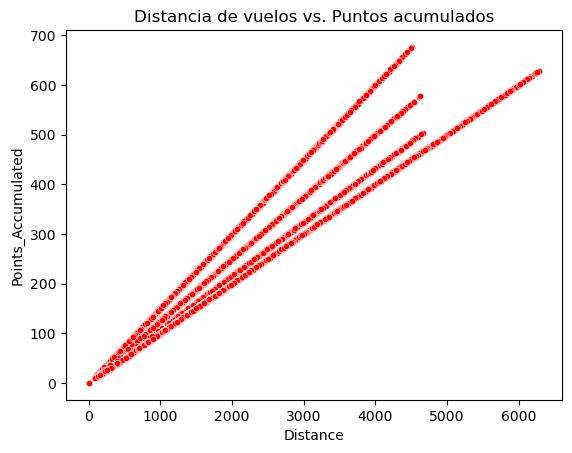

In [71]:
# 2. Relación entre distancia de vuelos y puntos acumulados
# Análisis bivariable numérico + análisis de tendencias/correlación --> scatterplot
sns.scatterplot(data=df_clientes, x="Distance", y="Points_Accumulated", color = 'red', s=20)
plt.title("Distancia de vuelos vs. Puntos acumulados");
# Vemos una clara correlacióm: más distancia = más puntos acumulados.

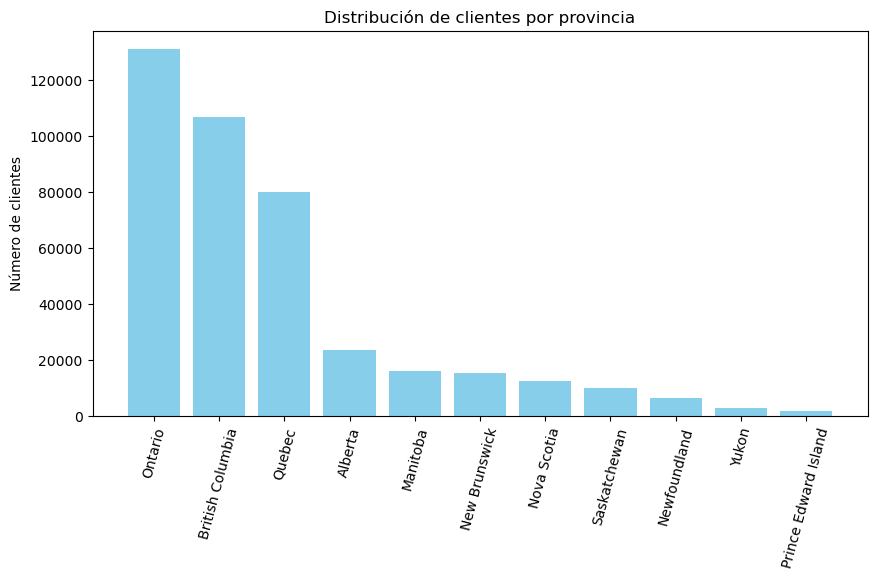

In [81]:
# 3. Distribución de clientes por provincia
# Preparamos los datos para contar según las 11 provincias
df_clientes_prov = df_clientes["Province"].value_counts().head(11).reset_index()
df_clientes_prov.columns = ["Province", "Loyalty_Number"]

# Preparamos el gráfico teniendo en cuenta relación de variables categóricas y numéricas --> barplot
plt.figure(figsize=(10,5)) # ajustamos el tamaño para que se lean y diferencien bien las provincias
plt.bar(df_clientes_prov["Province"], df_clientes_prov["Loyalty_Number"], color="skyblue")
plt.title("Distribución de clientes por provincia")
plt.ylabel("Número de clientes")
plt.xticks(rotation=75);

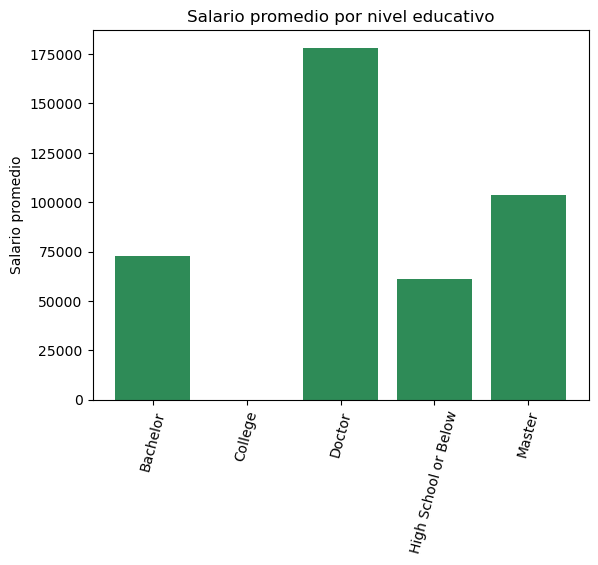

In [83]:
# 4. Salario promedio por nivel educativo
# Preparar los datos: salario promedio por nivel educativo
df_salario_edu = df_clientes.groupby("Education")["Salary"].mean().reset_index()
df_salario_edu.rename(columns={"Salary": "Salary_Mean"}, inplace=True)

# Preparamos el gráfico teniendo en cuenta relación de variables categóricas y numéricas --> barplot
plt.bar(df_salario_edu["Education"], df_salario_edu["Salary_Mean"], color="seagreen")
plt.xticks(rotation=75)
plt.title("Salario promedio por nivel educativo")
plt.ylabel("Salario promedio");

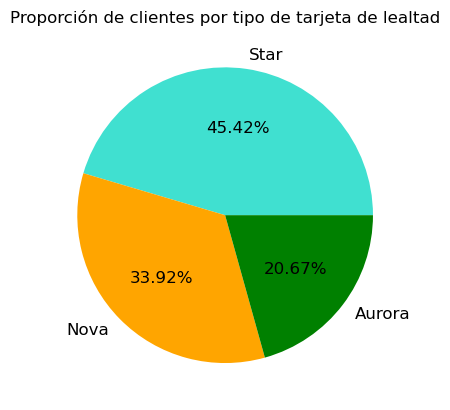

In [ ]:
# 5. Proporción de clientes por tipo de tarjeta
# Proporción de los diferentes tipos de tarjeta (univariable) --> pieplot
df_recuento = df_clientes['Loyalty_Card'].value_counts().reset_index()
colores = ["turquoise", "orange", "green"]
plt.pie(data=df_recuento, x = 'count', labels='Loyalty_Card', autopct=  '%1.2f%%', colors=colores, textprops={'fontsize': 12, 'color': 'black'})
plt.title("Proporción de clientes por tipo de tarjeta de lealtad");

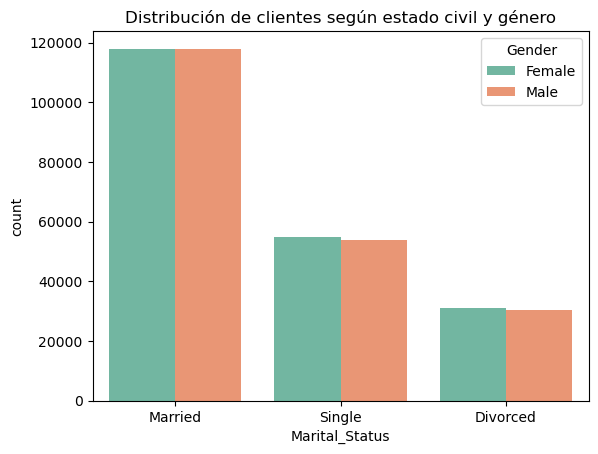

In [51]:
# 6. Distribución de clientes por estado civil y género
# Conteo de frecuencias con barras --> countplot
sns.countplot(data=df_clientes, x="Marital_Status", hue="Gender", palette="Set2")
plt.title("Distribución de clientes según estado civil y género");